The Boston housing dataset
For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."


NOTE: The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices.

In [1]:
!pip install --quiet keras_visualizer
from keras.models import Sequential
from keras.layers import Dense, Input

from keras_visualizer import visualizer
from IPython.display import Image

from keras.datasets import boston_housing, reuters
from keras.optimizers import *
from keras.metrics import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### **Step #1: Import and split the data into a train/test set**

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(404, 13)

#### **Steps Initialize NN and Add Input Layer**

In [4]:
# Build the model
model = Sequential()

# Input Layer
model.add(Input(x_train.shape[1]))

Now, complete the NN as follows and then visualize it:
* one hidden layer of size 20 with activation: `"relu"`
* the output layer of size 1 with activation: `"linear"` (so that we can get a range of values out, as needed by regression)

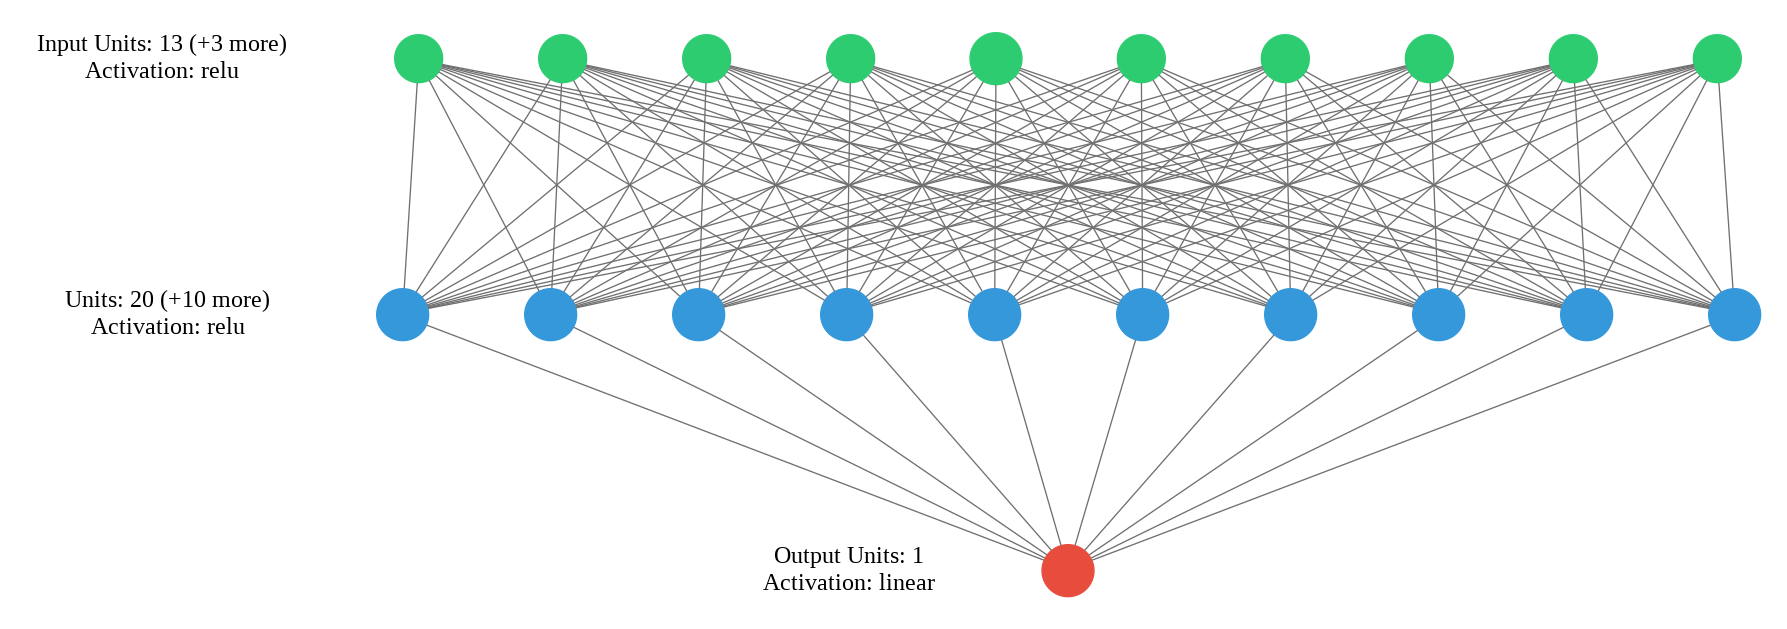

In [5]:
# Hidden Layer
model.add(Dense(20, activation='relu'))

# Output Layer
model.add(Dense(1, activation='linear'))

# Visualizing the network
#visualizer(model, view = True)
visualizer(model, file_name="model", file_format='png',view = True)
Image("model.png")

## Fit the model
- Set which optimizer you'd like to use to update the weights. We will use the Keras Adam Optimizer with a learning rate of 0.001.
- Compile the model. This is where we configure the model for training, inluding the loss function for optimization and the metric for evaluation after training. We will use the "mean_squared_error" for the loss and the mse (also the mean squared error) as our evaluation metric since this is a regression problem.
- Lastly we need to fit our model to the data. At this point we must set the number of training epochs, which is how many times we want to update the model.

Note: There are many calculations needed to train a neural network and it may take a few minutes. 

In [14]:
# Set the Optimizer and Learning Rate
opt = Adam(learning_rate=0.001)

# Compile the DNN
model.compile(optimizer=opt, 
              loss='mean_squared_error', 
              metrics = [mse])

# Fit the model
training_history = model.fit(x_train, y_train, epochs=1000, verbose=False)

In [11]:
# Set the Optimizer and Learning Rate
# opt = SGD(learning_rate=0.001)

# Compile the DNN
# model.compile(optimizer=opt,  loss='mean_absolute_percentage_error', metrics = [mse])

# Fit the model
# training_history = model.fit(x_train, y_train, epochs=500, verbose=False)

## Evaluate and test the model¶
After training our models, it's always important to get a sense of how well they've learned. So, let's evaluate and test our model! Specifically,

Evaluate the model on the test set
Plot the actual vs. predicted values

In [15]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 83.7198 - mean_squared_error: 83.7198


[83.71975708007812, 83.71975708007812]

## Plot the actual vs. predicted value

4/4 [==============================] - 0s 4ms/step


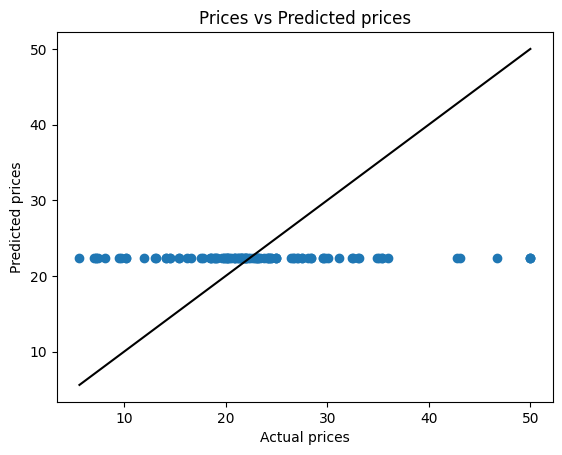

In [16]:
plt.scatter(y_test, model.predict(x_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

plt.show()